In [29]:
# CT4101 Assignment 2 - Steel Regression

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler


In [31]:
df = pd.read_csv("data/steel.csv")
df.head()

df.info()
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   normalising_temperature  553 non-null    float64
 1   tempering_temperature    553 non-null    int64  
 2   percent_silicon          553 non-null    float64
 3   percent_chromium         553 non-null    float64
 4   percent_copper           553 non-null    float64
 5   percent_nickel           553 non-null    float64
 6   percent_sulphur          553 non-null    float64
 7   percent_carbon           553 non-null    float64
 8   percent_manganese        553 non-null    float64
 9   tensile_strength         553 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 43.3 KB


,normalising_temperature,tempering_temperature,percent_silicon,percent_chromium,percent_copper,percent_nickel,percent_sulphur,percent_carbon,percent_manganese,tensile_strength
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000
mean,478.205222,752.124774,0.063890,1.277492,0.784018,0.972592,0.059302,1.817157,0.577192,192.048148
std,162.317845,259.220817,0.080655,0.260280,0.068589,0.074270,0.055396,0.185422,0.623316,91.134383
min,178.500000,225.000000,0.000000,0.745783,0.594000,0.801000,0.000000,1.378000,0.000000,12.824943
25%,382.987500,550.000000,0.000000,1.065888,0.753450,0.932000,0.000000,1.680800,0.000000,126.201687
50%,465.850000,900.000000,0.000000,1.286314,0.784000,0.968000,0.061000,1.857000,0.244600,182.556353
75%,570.500000,900.000000,0.129800,1.492220,0.830000,1.028100,0.101000,1.920000,1.175400,245.501719
max,945.000000,950.000000,0.359400,1.794173,0.945000,1.125000,0.322000,2.470000,1.950000,454.295736


In [32]:
df.isnull().sum()

normalising_temperature    0
tempering_temperature      0
percent_silicon            0
percent_chromium           0
percent_copper             0
percent_nickel             0
percent_sulphur            0
percent_carbon             0
percent_manganese          0
tensile_strength           0
dtype: int64

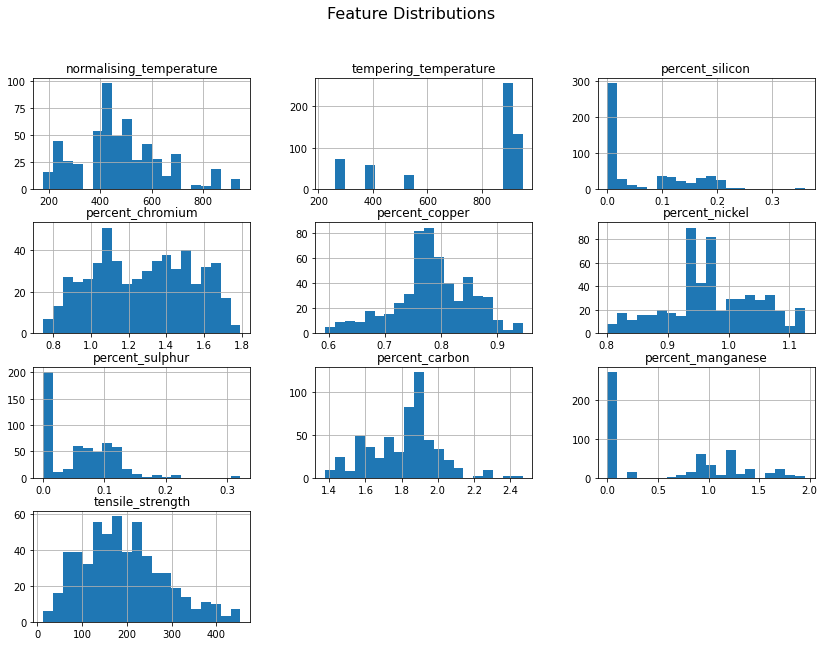

In [33]:
df.hist(figsize=(14, 10), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.savefig("results/Feature Distributions.png", dpi=300, bbox_inches="tight")
plt.show()


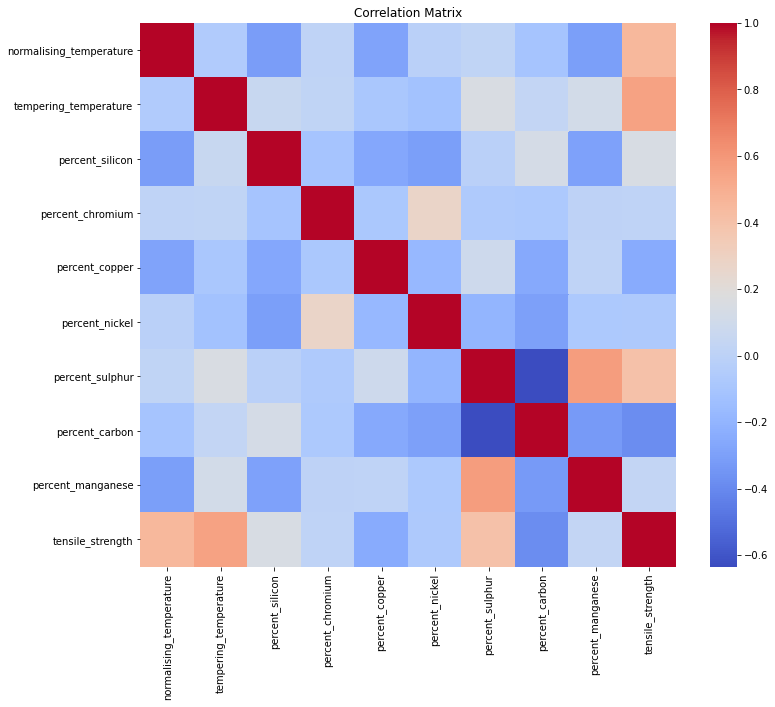

In [34]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.savefig("results/Correlation Matrix.png", dpi=300, bbox_inches="tight")
plt.show()


In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = df.drop("tensile_strength", axis=1)
y = df["tensile_strength"]

X_scaled = scaler.fit_transform(X)
